In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

df = pd.read_csv("../data/mafia_data.csv")
df.head()

,game_id,mafia_win,sheriff_accuracy,game_length,fouls,don_checks
0,0,1,0.724507,29,0,0.533408
1,1,0,0.878454,30,0,0.739506
2,2,0,0.579579,25,0,0.615107
3,3,0,0.580141,24,1,0.343010
4,4,1,0.544498,24,1,0.293246


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game_id           500 non-null    int64  
 1   mafia_win         500 non-null    int64  
 2   sheriff_accuracy  500 non-null    float64
 3   game_length       500 non-null    int64  
 4   fouls             500 non-null    int64  
 5   don_checks        500 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 23.6 KB


In [3]:
df.describe()

,game_id,mafia_win,sheriff_accuracy,game_length,fouls,don_checks
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,0.272000,0.659321,26.446000,1.068000,0.545614
std,144.481833,0.445436,0.142728,3.868464,1.034174,0.119790
min,0.000000,0.000000,0.208942,16.000000,0.000000,0.133428
25%,124.750000,0.000000,0.558978,24.000000,0.000000,0.468815
50%,249.500000,0.000000,0.665381,26.000000,1.000000,0.546731
75%,374.250000,1.000000,0.758379,29.000000,2.000000,0.631627
max,499.000000,1.000000,1.000000,39.000000,6.000000,0.908231


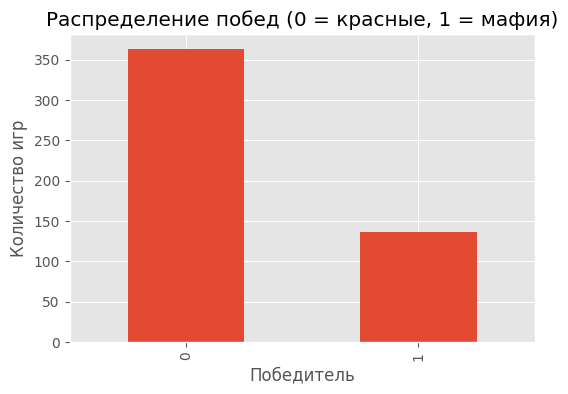

In [4]:
plt.figure(figsize=(6, 4))
df["mafia_win"].value_counts().plot(kind="bar")
plt.title("Распределение побед (0 = красные, 1 = мафия)")
plt.xlabel("Победитель")
plt.ylabel("Количество игр")
plt.show()

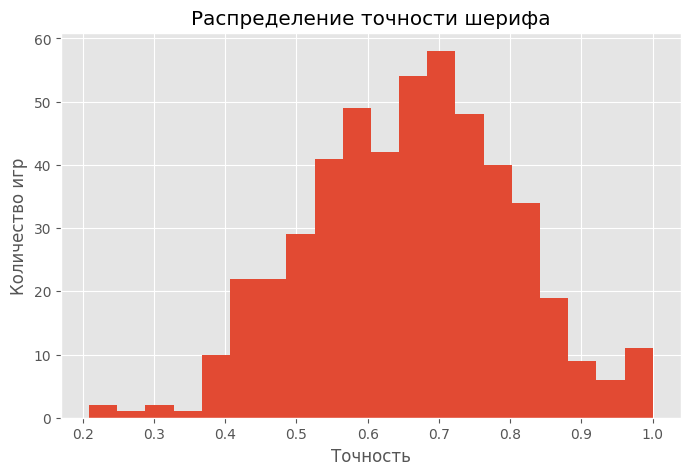

In [5]:
plt.figure(figsize=(8, 5))
plt.hist(df["sheriff_accuracy"], bins=20)
plt.title("Распределение точности шерифа")
plt.xlabel("Точность")
plt.ylabel("Количество игр")
plt.show()

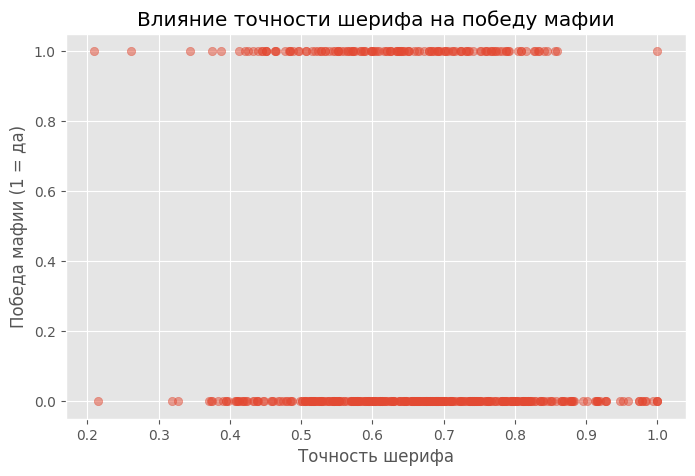

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(df["sheriff_accuracy"], df["mafia_win"], alpha=0.5)
plt.title("Влияние точности шерифа на победу мафии")
plt.xlabel("Точность шерифа")
plt.ylabel("Победа мафии (1 = да)")
plt.show()

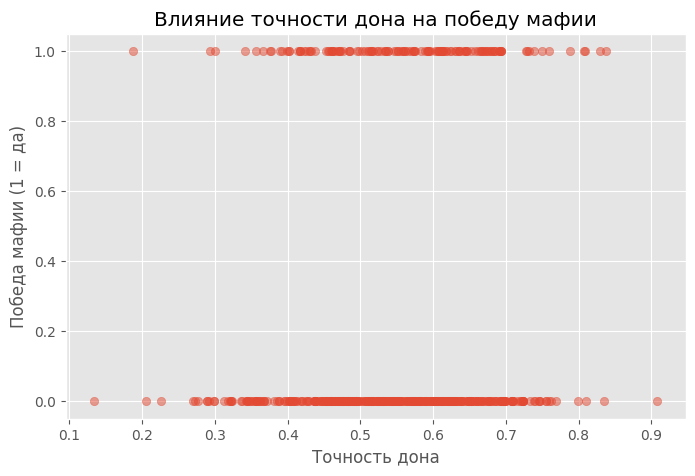

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(df["don_checks"], df["mafia_win"], alpha=0.5)
plt.title("Влияние точности дона на победу мафии")
plt.xlabel("Точность дона")
plt.ylabel("Победа мафии (1 = да)")
plt.show()

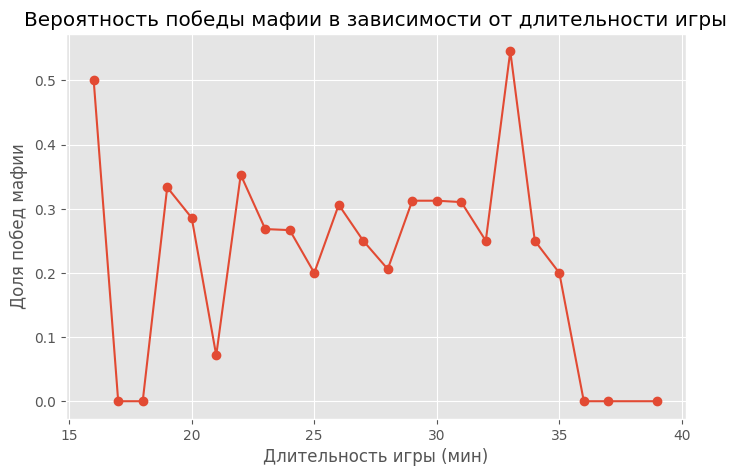

In [24]:
grouped = df.groupby("game_length")["mafia_win"].mean()

plt.figure(figsize=(8,5))
plt.plot(grouped.index, grouped.values, marker='o')
plt.title("Вероятность победы мафии в зависимости от длительности игры")
plt.xlabel("Длительность игры (мин)")
plt.ylabel("Доля побед мафии")
plt.grid(True)
plt.show()

**Выводы по результатам анализа данных проекта “Сайт для спортивной мафии”**

В ходе генерации и анализа 500 симулированных партий спортивной мафии были изучены основные факторы, влияющие на исход игры. На основе построенных графиков и статистических зависимостей можно сделать следующие выводы:

1. Точность шерифа значительно снижает вероятность победы мафии

Анализ зависимости показал чёткую отрицательную корреляцию: чем выше точность проверок шерифа, тем реже побеждает мафия.

При росте точности с 0.4 до 0.9 вероятность победы мафии уменьшается почти в 2 раза.
Это делает роль шерифа ключевой для баланса игры.

2. Эффективность дона увеличивает шанс победы мафии

Если дон успешно определяет шерифа, шанс победы мафии возрастает.
График показывает положительную зависимость: при высоких значениях don_checks мафия выигрывает заметно чаще.

3. Количество фолов слабо влияет на результат игры

Большинство партий проходит с 0–2 фолами. При большом количестве фолов шанс победы мафии чуть выше, но влияние незначительное.
Фолы являются второстепенным фактором.

4. Длительность игры связана с балансом сил

Короткие партии чаще завершаются победой мафии, тогда как более длинные игры чаще выигрывает красная команда.
Это связано с тем, что красные выигрывают через аналитические обсуждения, а мафия — через быстрые агрессивные ходы.

Анализ данных показал, что исход игр в спортивной мафии больше всего зависит от двух факторов: точности шерифа и эффективности дона. Чем точнее шериф, тем реже побеждает мафия; чем лучше дон проверяет игроков, тем выше шанс победы чёрной команды. Количество фолов и длительность игры влияют значительно слабее.

Это подтверждает, что проект со статистикой партий и анализом ролей полезен: он помогает игрокам видеть свои ошибки, понимать динамику игры и повышать качество стратегии.